# Projeto Wireless Power Transmission (WPT) 

## Objetivo:
Transmitir energia elétrica entre dois pontos a pelo ar. (WIP)

## Integrantes do grupo:  
Bernardo Cunha Capoferri  
Guilherme Dantas Rameh  
Henrique Martinelli Frezzatti  
Lívia Sayuri Makuta

In [38]:
# Importando bibliotecas necessárias para o projeto.
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

## Variáveis Projeto.

In [39]:
# Declarando variáveis do transformador
k = 0.1
r1 = 0.2
r2 = 0.2
l1 = 300e-6
l2 = 300e-6
c1 = 10e-6
c2 = 10e-6

# Variaveis do sistema
v1 = rect(50,0)
rc = 100

## Funções Projeto.

In [40]:
# Funções a seren usadas
def calcularFreqRessonancia(l,c):
    fr = 1/(2*pi*sqrt(l*c))
    return fr

def calcularTransformadores(v1, rc, freq, k=k):
    w = 2*pi*freq
    m = k*sqrt(l1*l2)
    # Calculara impedâncias
    xl1 = 1j*w*l1
    xl2 = 1j*w*l2
    xc1 = 1/(1j*w*c1)
    xc2 = 1/(1j*w*c2)
    xm = 1j*w*m
    paralelo = (xc2*rc)/(xc2+rc)
    
    z = np.array([[r1 + xc1 + xl1, -xm],[-xm, xl2 + r2 + paralelo]])
    v = np.array([v1,0])
    i = np.dot(linalg.inv(z),v)
    return i[0], i[1]

## Encontrando Frequência de ressonância.

Essa é a freq de ressonância (2905.758415662736+0j)


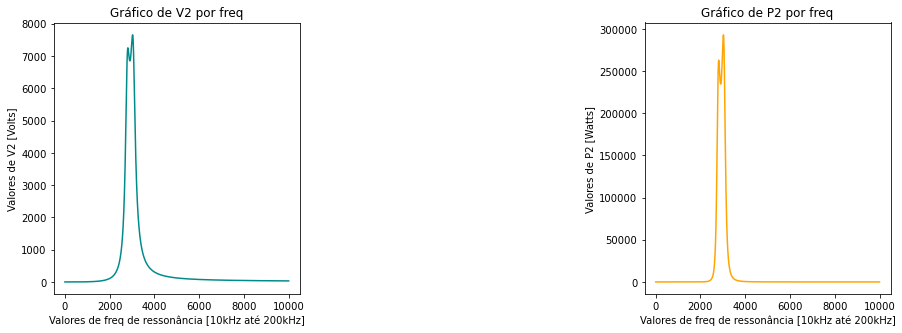

In [41]:
fr = calcularFreqRessonancia(l1,c1)
print("Essa é a freq de ressonância", fr)

listafreqr = np.linspace(1,10000, 10000)
listaV2proj =[]
listaP2proj = []
for freq in (listafreqr):
    i1proj, i2proj = calcularTransformadores(v1,rc, freq)
    V2proj = i2proj*rc
    V2efproj = V2proj/sqrt(2)
    ief_conjugado = (i2proj.conjugate())/sqrt(2)
    P2proj = V2efproj*ief_conjugado
    listaV2proj.append(abs(V2proj))
    listaP2proj.append(abs(P2proj))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(listafreqr, listaV2proj, color="darkcyan")
plt.title("Gráfico de V2 por freq")
plt.xlabel("Valores de freq de ressonância [10kHz até 200kHz]")
plt.ylabel("Valores de V2 [Volts]")
    
plt.subplot(1,3,3)
plt.plot(listafreqr, listaP2proj, color="orange")
plt.title("Gráfico de P2 por freq")
plt.xlabel("Valores de freq de ressonância [10kHz até 200kHz]")
plt.ylabel("Valores de P2 [Watts]")
plt.show()

## Encontrando frequência que resulta na transferência máxima de energia.

Esse é o i1 máximo: 94.71435624761877
Esse é o i2 máximo: 76.53106390478072
Essa é frequência máxima do i1 3064.0
Essa é frequência máxima do i2 3026.0


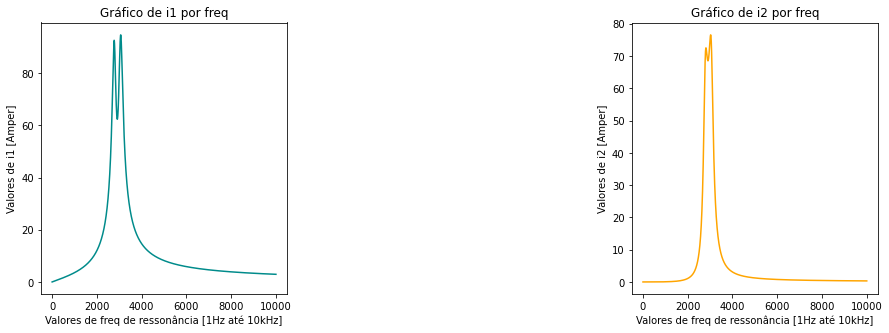

In [42]:
listai1 =[]
listai2 =[]
for freq in (listafreqr):    
    i1proj, i2proj = calcularTransformadores(v1,rc, freq)
    listai1.append(abs(i1proj))
    listai2.append(abs(i2proj))


i1Maximo = max(listai1)
i2Maximo = max(listai2)
print("Esse é o i1 máximo:", max(listai1))
print("Esse é o i2 máximo:", max(listai2))

indexi1 = listai1.index(i1Maximo)
indexi2 = listai2.index(i2Maximo)

freqmaxima1 = listafreqr[indexi1]
freqmaxima2 = listafreqr[indexi2]

print("Essa é frequência máxima do i1", freqmaxima1)
print("Essa é frequência máxima do i2", freqmaxima2)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(listafreqr, listai1, color="darkcyan")
plt.title("Gráfico de i1 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de i1 [Amper]")
    
plt.subplot(1,3,3)
plt.plot(listafreqr, listai2, color="orange")
plt.title("Gráfico de i2 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de i2 [Amper]")
plt.show()

## Encontrando máximos variando K.

<Figure size 1080x360 with 0 Axes>

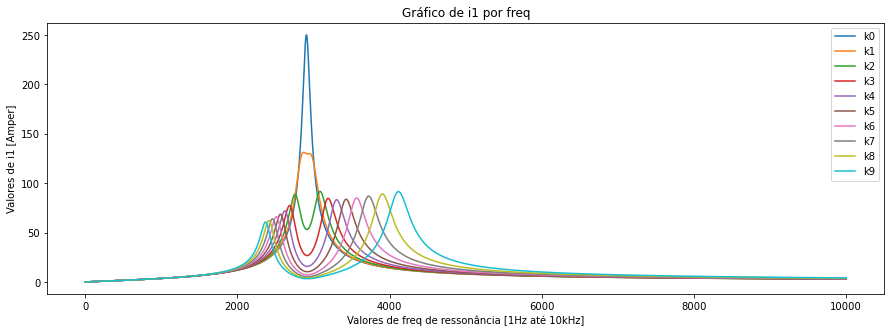

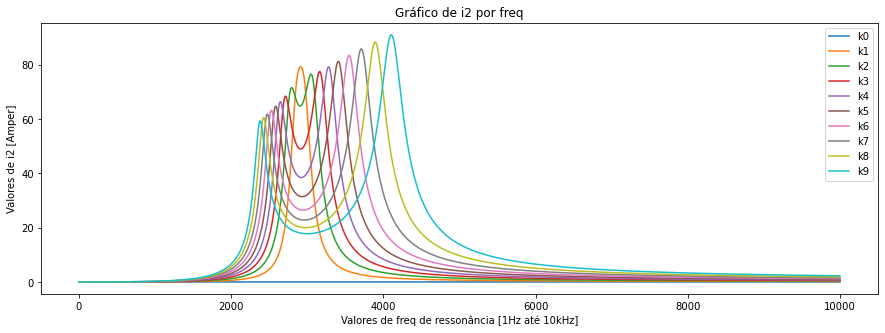

Esse é o i1 máximo: 94.71435624761877
Esse é o i2 máximo: 76.53106390478072
Essa é frequência máxima do i1 3064.0
Essa é frequência máxima do i2 3026.0


In [43]:
lista_ks = np.linspace(0,0.5, 10)
plt.figure(figsize=(15,5))

lista_ploti1 = []
lista_ploti2 = []

for k in lista_ks:
    listai1_ks =[]
    listai2_ks =[]
    for freq in (listafreqr):    
        i1proj, i2proj = calcularTransformadores(v1,rc,freq,k=k)
        listai1_ks.append(abs(i1proj))
        listai2_ks.append(abs(i2proj))
    
    lista_ploti1.append(listai1_ks)
    lista_ploti2.append(listai2_ks)
    


plt.figure(figsize=(15,5))
for i in range(len(lista_ploti1)):
    plot = lista_ploti1[i]
    plt.plot(listafreqr, plot, label=f"k{i}")
plt.title("Gráfico de i1 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de i1 [Amper]")
plt.legend() 

plt.figure(figsize=(15,5))
for i in range(len(lista_ploti2)):
    plot = lista_ploti2[i]
    plt.plot(listafreqr, plot, label=f"k{i}")
plt.title("Gráfico de i2 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de i2 [Amper]")
plt.legend() 

   
plt.show()


i1Maximo = max(listai1)
i2Maximo = max(listai2)
print("Esse é o i1 máximo:", max(listai1))
print("Esse é o i2 máximo:", max(listai2))

indexi1 = listai1.index(i1Maximo)
indexi2 = listai2.index(i2Maximo)

freqmaxima1 = listafreqr[indexi1]
freqmaxima2 = listafreqr[indexi2]

print("Essa é frequência máxima do i1", freqmaxima1)
print("Essa é frequência máxima do i2", freqmaxima2)

## Calculando Potência de Carga para diversos Ks.

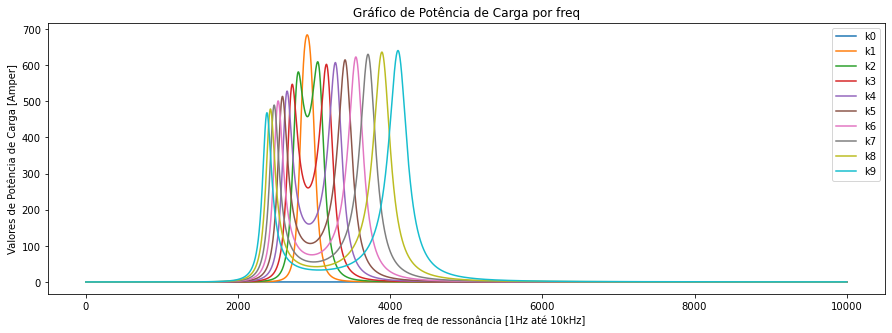

In [44]:
v1 = rect(10,0)
lista_ks = np.linspace(0,0.5, 10)

lista_plotpotcarga = []
lista_plotef = []

for k in lista_ks:
    listaPotCarga_ks =[]
    listaEf_ks = []
    for freq in (listafreqr):
        w = 2*pi*freq
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        paralelo = (xc2*rc)/(xc2+rc) 
        i1proj, i2proj = calcularTransformadores(v1,rc,freq,k=k)
        v2 = i2proj*paralelo
        pot_carga = (v2/sqrt(2))*(i2proj.conjugate()/sqrt(2))
        pot_fonte = (v1/sqrt(2))*(i1proj.conjugate()/sqrt(2))
        eficiencia = (pot_carga.real/pot_fonte.real)
        
        listaPotCarga_ks.append(abs(pot_carga))
        listaEf_ks.append(abs(eficiencia))
    
    lista_plotpotcarga.append(listaPotCarga_ks)
    lista_plotef.append(listaEf_ks)


plt.figure(figsize=(15,5))
for i in range(len(lista_plotpotcarga)):
    plot = lista_plotpotcarga[i]
    plt.plot(listafreqr, plot, label=f"k{i}")
plt.title("Gráfico de Potência de Carga por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de Potência de Carga [Amper]")
plt.legend()

plt.show()

## Plotando Eficiência para diferentes frequências e diferentes Ks.

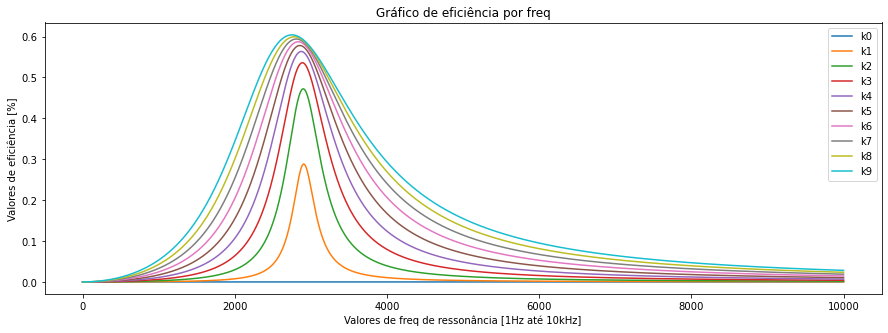

In [45]:
plt.figure(figsize=(15,5))
for i in range(len(lista_plotef)):
    plot = lista_plotef[i]
    plt.plot(listafreqr, plot, label=f"k{i}")
plt.title("Gráfico de eficiência por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de eficiência [%]")
plt.legend() 
   
plt.show()